In [1]:
import symtdd
import qiskit
import quimb.tensor as qtn

In [3]:
param1 = qiskit.circuit.Parameter('x1')
param2 = qiskit.circuit.Parameter('x2')
cir = qiskit.QuantumCircuit(2)
cir.h(0)
cir.cx(0, 1)
cir.rz(2*param1+param2, 0)

In [4]:
aa = cir.parameters[0]
aa.name

'x1'

In [5]:
bb = cir.data[2]
bb.operation.name, bb.operation.params

('rz', [ParameterExpression(2*x1 + x2)])

In [6]:
cc = bb.operation.params[0]
type(cc), cc.parameters

(qiskit.circuit.parameterexpression.ParameterExpression,
 {Parameter(x1), Parameter(x2)})

In [7]:
dd = cc.sympify()
dd.args

(x2, 2*x1)

In [8]:
circ = qtn.Circuit(N=2)

for i in range(2):
    circ.apply_gate('H', i, gate_round=0)

circ.apply_gate('cx', 0, 1, contract=False)
circ.apply_gate('rz', 0.5, 0)
circ.apply_gate('rx', 0.7, 1, parametrize=True)

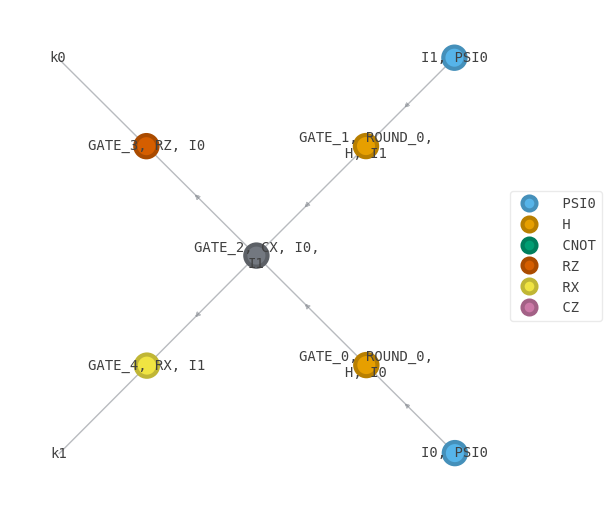

In [9]:
circ.psi.draw(color=['PSI0', 'H', 'CNOT', 'RZ', 'RX', 'CZ'])

In [10]:
aa = circ.psi

In [11]:
aa.tensor_map

{0: Tensor(shape=(2,), inds=('_302a2fAAAAA',), tags=oset(['I0', 'PSI0'])),
 1: Tensor(shape=(2,), inds=('_302a2fAAAAB',), tags=oset(['I1', 'PSI0'])),
 2: Tensor(shape=(2, 2), inds=('_302a2fAAAAC', '_302a2fAAAAA'), tags=oset(['GATE_0', 'ROUND_0', 'H', 'I0'])),
 3: Tensor(shape=(2, 2), inds=('_302a2fAAAAD', '_302a2fAAAAB'), tags=oset(['GATE_1', 'ROUND_0', 'H', 'I1'])),
 4: Tensor(shape=(2, 2, 2, 2), inds=('_302a2fAAAAE', '_302a2fAAAAF', '_302a2fAAAAC', '_302a2fAAAAD'), tags=oset(['GATE_2', 'CX', 'I0', 'I1'])),
 5: Tensor(shape=(2, 2), inds=('k0', '_302a2fAAAAE'), tags=oset(['GATE_3', 'RZ', 'I0'])),
 6: PTensor(shape=(2, 2), inds=('k1', '_302a2fAAAAF'), tags=oset(['GATE_4', 'RX', 'I1']))}

In [12]:
aa.tensors

(Tensor(shape=(2,), inds=('_302a2fAAAAA',), tags=oset(['I0', 'PSI0'])),
 Tensor(shape=(2,), inds=('_302a2fAAAAB',), tags=oset(['I1', 'PSI0'])),
 Tensor(shape=(2, 2), inds=('_302a2fAAAAC', '_302a2fAAAAA'), tags=oset(['GATE_0', 'ROUND_0', 'H', 'I0'])),
 Tensor(shape=(2, 2), inds=('_302a2fAAAAD', '_302a2fAAAAB'), tags=oset(['GATE_1', 'ROUND_0', 'H', 'I1'])),
 Tensor(shape=(2, 2, 2, 2), inds=('_302a2fAAAAE', '_302a2fAAAAF', '_302a2fAAAAC', '_302a2fAAAAD'), tags=oset(['GATE_2', 'CX', 'I0', 'I1'])),
 Tensor(shape=(2, 2), inds=('k0', '_302a2fAAAAE'), tags=oset(['GATE_3', 'RZ', 'I0'])),
 PTensor(shape=(2, 2), inds=('k1', '_302a2fAAAAF'), tags=oset(['GATE_4', 'RX', 'I1'])))

In [13]:
bb = aa.tensor_map[6]

In [14]:
import cotengra as ctg

/home/aoowweenn/work/Symbol_TDD/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:29: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [15]:
aa.all_inds()

('_302a2fAAAAA',
 '_302a2fAAAAB',
 '_302a2fAAAAC',
 '_302a2fAAAAD',
 '_302a2fAAAAE',
 'k0',
 '_302a2fAAAAF',
 'k1')

In [16]:
aa.get_symbol_map()

defaultdict(<method-wrapper '__next__' of map object at 0x7fdbbe906b60>,
            {'_302a2fAAAAA': 'a',
             '_302a2fAAAAB': 'b',
             '_302a2fAAAAC': 'c',
             '_302a2fAAAAD': 'd',
             '_302a2fAAAAE': 'e',
             '_302a2fAAAAF': 'f',
             'k0': 'g',
             'k1': 'h'})

In [17]:
aa.get_equation()

'c,d,ec,fd,ghef,ag,bh->ab'

In [18]:
input_str, output_str, size_dict = aa.get_inputs_output_size_dict()
input_str, output_str, size_dict

(['c', 'd', 'ec', 'fd', 'ghef', 'ag', 'bh'],
 'ab',
 {'c': 2, 'd': 2, 'e': 2, 'f': 2, 'g': 2, 'h': 2, 'a': 2, 'b': 2})

In [24]:
inputs = [tuple(s) for s in input_str]
output = tuple(output_str)

In [37]:
opt = ctg.HyperOptimizer()
tree = opt.search(input_str, output_str, size_dict)
# tree = opt.search(inputs, output, size_dict)
tree

<ContractionTree(N=7, branches=6, complete=True)>

In [38]:
tree.contraction_width(), tree.contraction_cost()

(3.0, 48.0)

In [39]:
path = tree.get_path()
path

((0, 2), (2, 5), (0, 1), (2, 3), (0, 2), (0, 1))

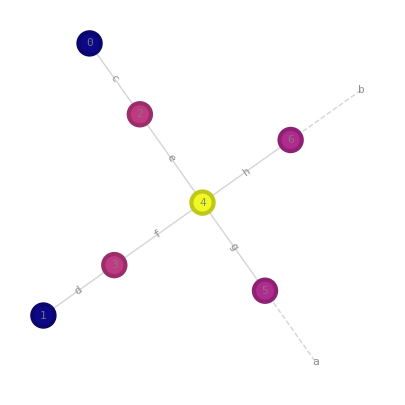

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [40]:
ctg.HyperGraph(inputs, output, size_dict).plot()

In [35]:
tree.root

frozenset({0, 1, 2, 3, 4, 5, 6})

In [34]:
tree.children

{frozenset({0, 2}): (frozenset({2}), frozenset({0})),
 frozenset({0, 2, 4}): (frozenset({0, 2}), frozenset({4})),
 frozenset({1, 3}): (frozenset({3}), frozenset({1})),
 frozenset({0, 1, 2, 3, 4}): (frozenset({0, 2, 4}), frozenset({1, 3})),
 frozenset({0, 1, 2, 3, 4, 5}): (frozenset({0, 1, 2, 3, 4}), frozenset({5})),
 frozenset({0, 1, 2, 3, 4, 5, 6}): (frozenset({0, 1, 2, 3, 4, 5}),
  frozenset({6}))}

In [36]:
tree.get_einsum_eq(tree.root)

'ab,ca->bc'

In [41]:
import opt_einsum as oe

# Take a complex string
einsum_string = aa.get_equation()

views = oe.helpers.build_views(aa.get_equation(), size_dict)

path, path_info = oe.contract_path(einsum_string, *views)

In [43]:
path

[(0, 2), (2, 5), (0, 1), (2, 3), (0, 2), (0, 1)]

In [42]:
path_info

  Complete contraction:  c,d,ec,fd,ghef,ag,bh->ab
         Naive scaling:  8
     Optimized scaling:  4
      Naive FLOP count:  1.792e+3
  Optimized FLOP count:  9.600e+1
   Theoretical speedup:  1.867e+1
  Largest intermediate:  8.000e+0 elements
--------------------------------------------------------------------------------
scaling        BLAS                current                             remaining
--------------------------------------------------------------------------------
   2           GEMM                ec,c->e                 d,fd,ghef,ag,bh,e->ab
   4    GEMV/EINSUM            e,ghef->ghf                    d,fd,ag,bh,ghf->ab
   2           GEMM                fd,d->f                       ag,bh,ghf,f->ab
   3           GEMM              f,ghf->gh                          ag,bh,gh->ab
   3           GEMM              gh,ag->ha                             bh,ha->ab
   3           GEMM              ha,bh->ab                                ab->ab

In [71]:
oe.contract("αβγ,βγδ,β->αδ", np.zeros((1,2,3)), np.zeros((2,3,4)), np.zeros((2,)))

array([[0., 0., 0., 0.]])

In [59]:
oe.contract(np.zeros((1,2,3)), [10,20,30], np.zeros((2,3,4)), [20,30,40])

array([[0., 0., 0., 0.]])

In [171]:
oe.contract_path(np.zeros((1,2,3)), [10,20,123], np.zeros((2,3,4)), [20,123,40], [10, 40])

([(0, 1)],
   Complete contraction:  abd,bdc->ac
          Naive scaling:  4
      Optimized scaling:  4
       Naive FLOP count:  4.800e+1
   Optimized FLOP count:  4.800e+1
    Theoretical speedup:  1.000e+0
   Largest intermediate:  4.000e+0 elements
 --------------------------------------------------------------------------------
 scaling        BLAS                current                             remaining
 --------------------------------------------------------------------------------
    4           GEMM            bdc,abd->ac                                ac->ac)

In [5]:
from TDD.TDD_Q import cir_2_tn
from TDD import TN, TDD
import sympy as sp
import numpy as np

def tn_2_symtdd(tn, indices):

    for k in range(tn.qubits_num):
        x_k='x'+str(k)
        xn_k='xn'+str(k)
        s=sp.Symbol(x_k)
        ns=sp.Symbol(xn_k)
        U=np.array([ns,s])
        # U=np.array([0,1])
        temp_ts=TN.Tensor(U,[TDD.Index(x_k)])
        tn.tensors.insert(0,temp_ts)
        if not x_k in indices:
            indices.append(x_k)

    TDD.Ini_TDD(indices,n=300,type='SymTDD',unique_table_reset=True)
    tdd,Max_node_num=tn.cont(max_node=True)

    return tdd

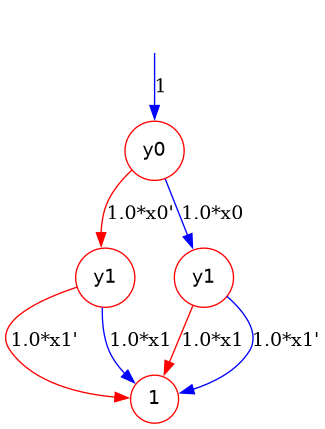

In [8]:
cir = qiskit.QuantumCircuit(2)
cir.cx(0, 1)
tn, indices = cir_2_tn(cir)
tdd = tn_2_symtdd(tn, indices)
tdd.show()

4


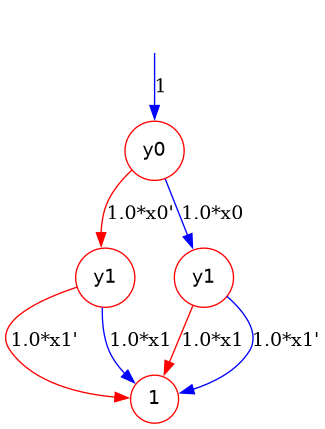

In [10]:
result_tdd, max_node = tn.cont(optimizer='opt_einsum', max_node=True)
print(max_node)
result_tdd.show()

In [12]:
def index_2_str(index):
    return index.key # + '_' + str(index.idx) if index.key[0] == 'x' else index.key

In [23]:
### gen indices from tn.tensors
indices = set([index_2_str(index) for tensor in tn.tensors for index in tensor.index_set])
indices

{'x0', 'x1', 'y0', 'y1'}

In [24]:
aa = tn.tensors[2]

In [25]:
[bb.__str__() for bb in aa.index_set]

["('x0', 0)", "('y0', 0)", "('x1', 0)", "('y1', 0)"]

In [26]:
index_id_dict = dict(zip(indices, range(len(indices))))
index_id_dict

{'x1': 0, 'x0': 1, 'y0': 2, 'y1': 3}

In [27]:
ts_index_seq = [(tensor.data, [index_id_dict[index_2_str(index)] for index in tensor.index_set]) for tensor in tn.tensors]

In [28]:
ts_index_flat_seq = sum(ts_index_seq, ())
ts_index_flat_seq

(array([xn1, x1], dtype=object),
 [0],
 array([xn0, x0], dtype=object),
 [1],
 array([[[[1, 0],
          [0, 1]],
 
         [[0, 0],
          [0, 0]]],
 
 
        [[[0, 0],
          [0, 0]],
 
         [[0, 1],
          [1, 0]]]]),
 [1, 2, 0, 3])

In [29]:
output_index_ids = [index_id_dict[index] for index in indices if index[0] == 'y']
output_index_ids

[2, 3]

In [31]:
import opt_einsum as oe
path, path_info = oe.contract_path(*ts_index_flat_seq, output_index_ids)
path, path_info

([(0, 1), (0, 1)],
   Complete contraction:  a,b,bcad->cd
          Naive scaling:  4
      Optimized scaling:  4
       Naive FLOP count:  4.800e+1
   Optimized FLOP count:  3.600e+1
    Theoretical speedup:  1.333e+0
   Largest intermediate:  4.000e+0 elements
 --------------------------------------------------------------------------------
 scaling        BLAS                current                             remaining
 --------------------------------------------------------------------------------
    2   OUTER/EINSUM                b,a->ba                           bcad,ba->cd
    4    GEMV/EINSUM            ba,bcad->cd                                cd->cd)

In [32]:
tdds = [tensor.tdd() for tensor in tn.tensors]

In [33]:
def tdds_contract_by_path(tdds, path):
    _tdds = tdds # inplace modify tdds by now
    for ts1, ts2 in path:
        tmp_tdd = TDD.cont(_tdds[ts1], _tdds[ts2])

        # TODO: use heapq to do in O(logn)
        [_tdds.remove(element) for element in [_tdds[ts1], _tdds[ts2]]]
        _tdds.append(tmp_tdd)

    return tmp_tdd

In [34]:
result_tdd = tdds_contract_by_path(tdds, path)

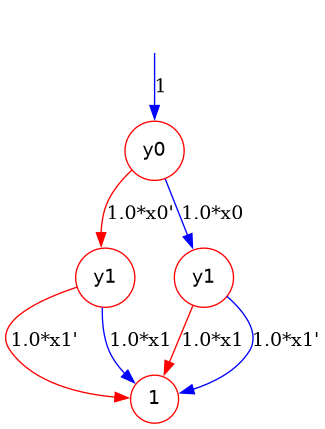

In [35]:
result_tdd.show()